Dataset: Customer infomation data (id, age, annual income, purchase amount, loyalty score, region, and purchase frequency)

Prediction: I will predict loyalty score which helps the business identify potentially highly-loyal customers. 

This is my first trial at implementing a linear regression model, hence, everything will be calculated manually.

### Step 1. Data Preparation

Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('Customer Purchasing Behaviors.csv')
print(df.head())

   user_id  age  annual_income  purchase_amount  loyalty_score region  \
0        1   39          57000              440            7.0  South   
1        2   34          55000              350            7.0  South   
2        3   45          65000              500            8.0   West   
3        4   22          30000              150            3.0   East   
4        5   29          47000              220            4.8  North   

   purchase_frequency  
0                  21  
1                  18  
2                  22  
3                  10  
4                  13  


Choose features: age, annual income, purchase amount, purchase frequency

Choose target: loyalty score

Choose s = 0.1: 90-10 train-test data split

In [3]:
x = np.array(df[['age','annual_income','purchase_amount','purchase_frequency']])
y = np.array(df['loyalty_score'])

m = y.size

print(f"Size of dataset: {m}")
print(f"Size of x: {x.shape}")
print(f"Size of y: {y.shape}")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Size of dataset: 238
Size of x: (238, 4)
Size of y: (238,)
x_train shape: (214, 4)
x_test shape: (24, 4)
y_train shape: (214,)
y_test shape: (24,)


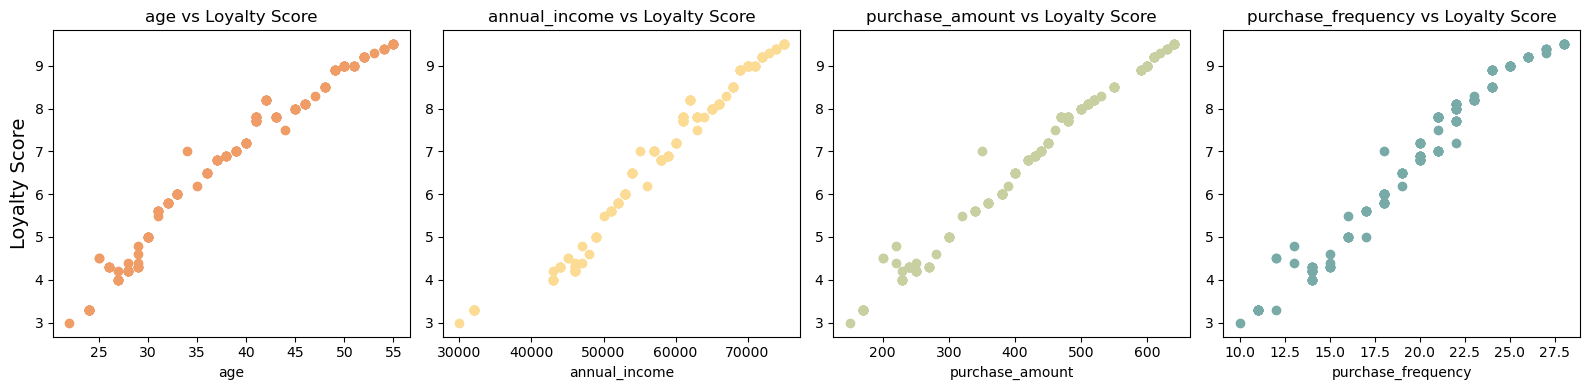

In [4]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
features = ['age', 'annual_income', 'purchase_amount', 'purchase_frequency']

for i, ax in enumerate(axes):
    color = ['#EF9C66', '#FCDC94', '#C8CFA0', '#78ABA8'][i]
    ax.scatter(x_train[:, i], y_train, color=color)
    ax.set_title(f'{features[i]} vs Loyalty Score')
    ax.set_xlabel(features[i])
    if i == 0:
        ax.set_ylabel('Loyalty Score', fontsize=14)

plt.tight_layout()
plt.show()

### STEP 2. NORMALILZATION

using Z-score

In [5]:
scaler = StandardScaler()

x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

print(f"x_train_norm shape: {x_train_norm.shape}")
print(f"x_test_norm shape: {x_test_norm.shape}")

x_train_norm shape: (214, 4)
x_test_norm shape: (24, 4)


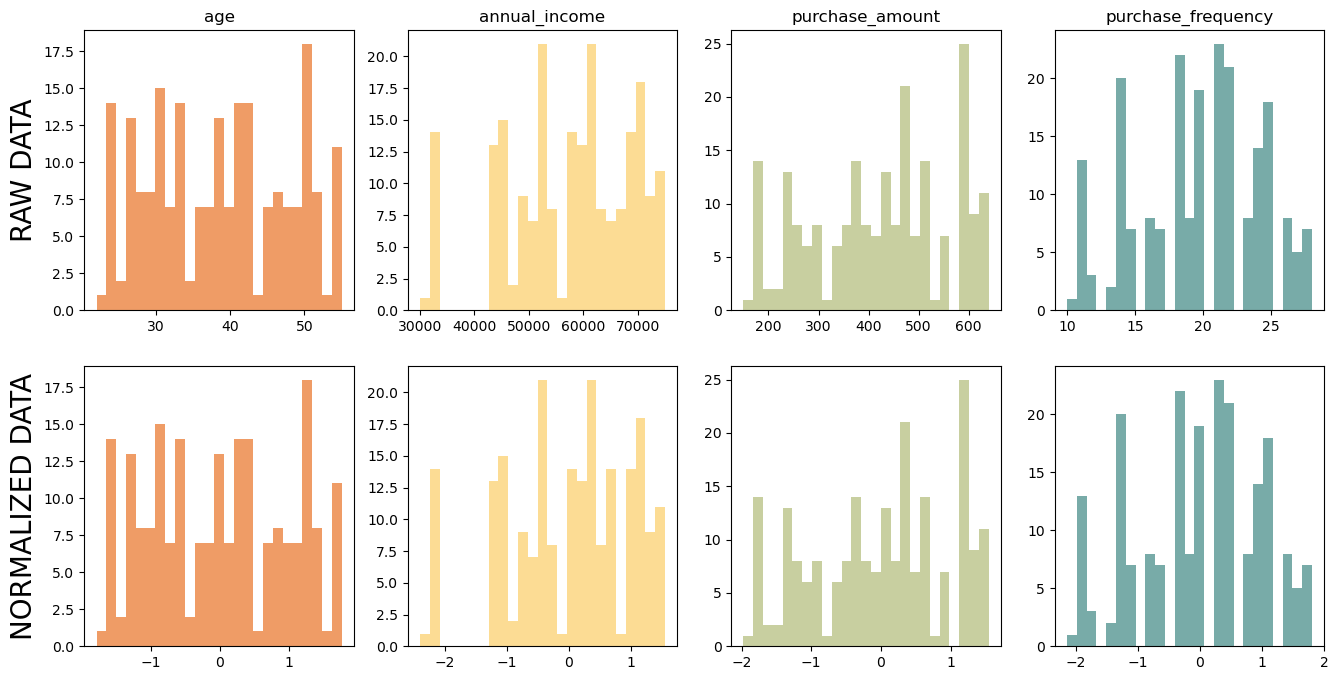

In [6]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
features = ['age', 'annual_income', 'purchase_amount', 'purchase_frequency']

for i, ax in enumerate(axes[0]):
    color = ['#EF9C66', '#FCDC94', '#C8CFA0', '#78ABA8'][i]
    ax.hist(x_train[:, i], bins=25, color=color)
    ax.set_title(features[i])
    if i == 0: ax.set_ylabel('RAW DATA', fontsize=20)

for i, ax in enumerate(axes[1]):
    color = ['#EF9C66', '#FCDC94', '#C8CFA0', '#78ABA8'][i]
    ax.hist(x_train_norm [:, i], bins=25, color=color)
    if i == 0: ax.set_ylabel('NORMALIZED DATA', fontsize=20)

plt.show()

The plots above show that the data was properly normalized.

### STEP 3. GRADIENT DESCENT

In [7]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(x_train_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 18, number of weight updates: 3853.0


In [8]:
w_norm = sgdr.coef_
b_norm = sgdr.intercept_

print(f"Scikit-learn model parameters:\nw:\n{w_norm}\nb:\n{b_norm}")

w_manual = [0.44188806, 0.46762103, 0.53144636, 0.43985721]
b_manual = [6.862752267175286]

print(f"Manual linear regression model parameters:\nw:\n{w_manual}\nb:\n{b_manual}")

Scikit-learn model parameters:
w:
[0.47221748 0.44169383 0.53520246 0.44831958]
b:
[6.77508979]
Manual linear regression model parameters:
w:
[0.44188806, 0.46762103, 0.53144636, 0.43985721]
b:
[6.862752267175286]


In [11]:
y_pred_sgd = sgdr.predict(x_test_norm)
y_pred = np.dot(x_test_norm,w_manual) + b_manual  

print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction using scikit:\n{y_pred_sgd[:4]}" )
print(f"Prediction from manual regression:\n{y_pred[:4]}" )
print(f"Target values \n{y_test[:4]}")

prediction using np.dot() and sgdr.predict match: False
Prediction using scikit:
[9.70478062 3.07901824 9.12370055 9.03395786]
Prediction from manual regression:
[9.76122447 3.1811443  9.18763408 9.09888096]
Target values 
[9.4 3.2 9.  9. ]


In [10]:
mae = mean_absolute_error(y_test, y_pred_sgd)
print(f'Overall Mean Absolute Error: {mae:.2f}%')

Overall Mean Absolute Error: 0.14
